# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

In [2]:
# Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
!pip install wn
!python -m wn download omw-he:1.4


Cached file found: C:\Users\chenb\.wn_data\downloads\7ecf10e89326bc0ac26ad94b40fe60a7b6ac3302

Checking C:\Users\chenb\AppData\Local\Temp\tmp6qs1jtel\omw-he\omw-he.xml
Skipping omw-he:1.4 (Hebrew Wordnet); already added



In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer


In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\chenb\Downloads\assignment5-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
# קריאת קבצי הנתונים למשתנים DataFrame
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [11]:
# הטיפול בטוקניזציה וסידור מחדש של הטקסט העברי מסיפורי האימון
stories = []
coppied_stories=0
seen_stories = set()  # רשימה של סיפורים שכבר נראו
for story in df_train['story']:
    hebrew_tokens = [token for grp, token, _, _ in ht.tokenize(story) if grp == 'HEBREW']
    hebrew_text = ' '.join(hebrew_tokens)
    if hebrew_text not in seen_stories:  # בדיקה אם הסיפור כבר נמצא ברשימה
        stories.append(hebrew_text)
        seen_stories.add(hebrew_text)  # הוספת הסיפור לרשימה של הסיפורים שכבר נראו
    else:
#         stories.append('')
        stories.append(hebrew_text)
        coppied_stories += 1
        
# הדפסת מספר הסיפורים החדשים שנמצאו
print("Number of unique stories:", len(stories)-coppied_stories)

# ניתוח השורות ב-DataFrame עבור הטיפול בטקסט
df_train['story'] = stories


# # fillna() במקרה של טקסט, נוכל להשתמש במתודה  
# # עם ערך קבוע, כמו רשימה ריקה או מחרוזת ריקה
# # כדי למלא את הערכים החסרים
# df_train['story'].fillna('', inplace=True)

print("Number of duplicated stories:",coppied_stories)
print('---------------------------------------')
train_missing_values = df_train.isnull().sum()
print("Number of train missing values:",train_missing_values)
print('---------------------------------------')
test_missing_values = df_test.isnull().sum()
print("Number of test missing values:",test_missing_values)

Number of unique stories: 749
Number of duplicated stories: 4
---------------------------------------
Number of train missing values: story     0
gender    0
dtype: int64
---------------------------------------
Number of test missing values: test_example_id    0
story              0
dtype: int64


In [12]:
# from nltk.corpus import stopwords 
# stop_words = set(stopwords.words("hebrew"))
# print(stop_words)

StopWords=[
'אני',
'את',
'אתה',
'אנחנו',
'אתן',
'אתם',
'הם',
'הן',
'היא',
'הוא',
'שלי',
'שלו',
'שלך',
'שלה',
'שלנו',
'שלכם',
'שלכן',
'שלהם',
'שלהן',
'לי',
'לו',
'לה',
'לנו',
'לכם',
'לכן',
'להם',
'להן',
'אותה',
'אותו',
'זה',
'זאת',
'אלה',
'אלו',
'תחת',
'מתחת',
'מעל',
'בין',
'עם',
'עד',
'נגר',
'על',
'אל',
'מול',
'של',
'אצל',
'כמו',
'אחר',
'אותו',
'בלי',
'לפני',
'אחרי',
'מאחורי',
'עלי',
'עליו',
'עליה',
'עליך',
'עלינו',
'עליכם',
'לעיכן',
'עליהם',
'עליהן',
'כל',
'כולם',
'כולן',
'כך',
'ככה',
'כזה',
'זה',
'זות',
'אותי',
'אותה',
'אותם',
'אותך',
'אותו',
'אותן',
'אותנו',
'ואת',
'את',
'אתכם',
'אתכן',
'איתי',
'איתו',
'איתך',
'איתה',
'איתם',
'איתן',
'איתנו',
'איתכם',
'איתכן',
'יהיה',
'תהיה',
'היתי',
'היתה',
'היה',
'להיות',
'עצמי',
'עצמו',
'עצמה',
'עצמם',
'עצמן',
'עצמנו',
'עצמהם',
'עצמהן',
'מי',
'מה',
'איפה',
'היכן',
'במקום שבו',
'אם',
'לאן',
'למקום שבו',
'מקום בו',
'איזה',
'מהיכן',
'איך',
'כיצד',
'באיזו מידה',
'מתי',
'בשעה ש',
'כאשר',
'כש',
'למרות',
'לפני',
'אחרי',
'מאיזו סיבה',
'הסיבה שבגללה',
'למה',
'מדוע',
'לאיזו תכלית',
'כי',
'יש',
'אין',
'אך',
'מנין',
'מאין',
'מאיפה',
'יכל',
'יכלה',
'יכלו',
'יכול',
'יכולה',
'יכולים',
'יכולות',
'יוכלו',
'יוכל',
'מסוגל',
'לא',
'רק',
'אולי',
'אין',
'לאו',
'אי',
'כלל',
'נגד',
'אם',
'עם',
'אל',
'אלה',
'אלו',
'אף',
'על',
'מעל',
'מתחת',
'מצד',
'בשביל',
'לבין',
'באמצע',
'בתוך',
'דרך',
'מבעד',
'באמצעות',
'למעלה',
'למטה',
'מחוץ',
'מן',
'לעבר',
'מכאן',
'כאן',
'הנה',
'הרי',
'פה',
'שם',
'אך',
'ברם',
'שוב',
'אבל',
'מבלי',
'בלי',
'מלבד',
'רק',
'בגלל',
'מכיוון',
'עד',
'אשר',
'ואילו',
'למרות',
'אס',
'כמו',
'כפי',
'אז',
'אחרי',
'כן',
'לכן',
'לפיכך',
'מאד',
'ל',
'עז',
'מעט',
'מעטים',
'במידה',
'שוב',
'יותר',
'מדי',
'גם',
'כן',
'נו',
'אחר',
'אחרת',
'אחרים',
'אחרות',
'אשר',
'או']


In [13]:
hebrew_filtered_text=""
filtered_final_tokens=[]
final_tokens=[]
for story in df_train['story']:
    tokens = ht.tokenize(story)  
    for grp, token, token_num, (start_index, end_index) in tokens:
        if grp =='HEBREW':
            final_tokens.append(token)
            if token not in StopWords:
                filtered_final_tokens.append(token)
#         hebrew_filtered_text = ' '.join(filtered_final_tokens)
    
    

#df_train['story'] = filtered_stories

<FreqDist with 34552 samples and 250923 outcomes>


[('את', 5034), ('לא', 3543)]

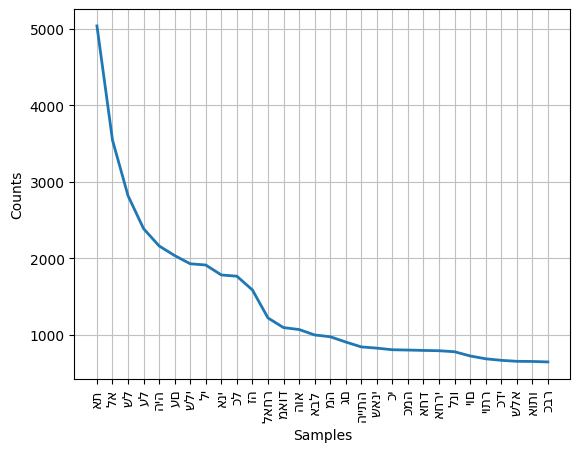

<Axes: xlabel='Samples', ylabel='Counts'>

<FreqDist with 34378 samples and 195475 outcomes>


[('לאחר', 1222), ('מאוד', 1096)]

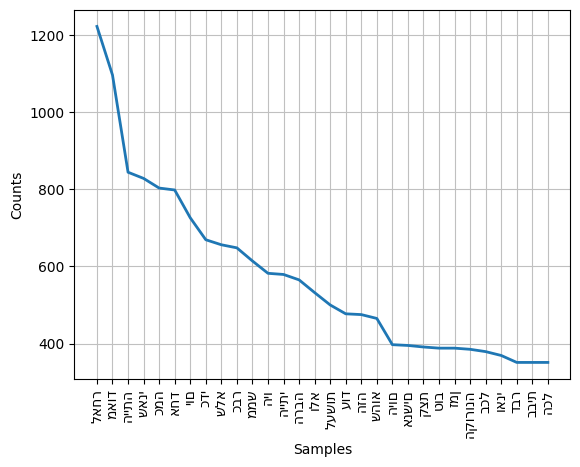

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
!pip install nltk

from nltk.probability import FreqDist 
fdist = FreqDist(final_tokens)
print(fdist)
fdist.most_common(2)
fdist.plot(30,cumulative=False)
plt.show()


# hebrew_filtered_text=""
# #df_train['story'] = filtered_stories
# filtered_final_tokens=[]
# for story in df_train['story']:
#     tokens = ht.tokenize(story)  
#     for grp, token, token_num, (start_index, end_index) in tokens:
#         if grp =='HEBREW':
#             if token not in StopWords:
#                 hebrew_filtered_text = ' '.join(filtered_final_tokens)
#                 filtered_final_tokens.append(token)
               
    

fdist2 = FreqDist(filtered_final_tokens)
print(fdist2)
fdist2.most_common(2)
fdist2.plot(30,cumulative=False)
plt.show()

# print(hebrew_tokens)
# print(filtered_stories)

In [15]:
# המרת המשתנה הקטגוריאלי ה"תלוש" לערכים בינאריים
df_train['gender'] = df_train['gender'].map({'m': 1, 'f': 0})

# חלוקת הנתונים למשתנה התלוש ולתווית
x_train = df_train['story']
y_train = df_train['gender']

In [16]:
# יצירת מודל הטיפוסים והמחלק
tfidf_vec = TfidfVectorizer()
# Term frequency = (Number of Occurrences of a word)/(Total words in the document)
# IDF(word) = Log((Total number of documents)/(Number of documents containing the word))
classifier = SGDClassifier(max_iter=1000, random_state=42)
pipe = Pipeline([('tfidf', tfidf_vec), ('clf', classifier)])

In [17]:
# הגדרת הפרמטרים לחיפוש המודל הטוב ביותר
params = {
    'tfidf__max_df': [0.5, 0.7, 0.9],
    'tfidf__max_features': [150, 200, 250, 300, 350, 1000],
    'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'clf__penalty': ['l2', 'l1', 'elasticnet'],
    'clf__alpha': [0.0001, 0.092, 0.001]
}

In [18]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
print(x_train)

0      כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...
1      לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...
2      מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...
3      כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...
4      הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...
                             ...                        
748    אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...
749    שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...
750    לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...
751    החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים ז...
752    פעם כשהייתי בחו ל בקבולומביה כחלק מהטיול שלי ל...
Name: story, Length: 753, dtype: object


In [19]:
# הגדרת החיפוש המצוין
# grid_search = GridSearchCV(pipe, cv=10, param_grid=params, scoring='f1_macro', n_jobs=1)
# grid_search = GridSearchCV(pipe, cv=10, param_grid=params,scoring='f1_macro')
grid_search = GridSearchCV(pipe, cv=10, param_grid=params, scoring='f1_macro', n_jobs=1, verbose=2)
best_clf = grid_search.fit(x_train, y_train)


# הדפסת הפרמטרים הטובים ביותר והציון הטוב ביותר שנמצא
print("Best parameters from gridsearch: {}".format(best_clf.best_params_))
print("CV score=%0.3f" % best_clf.best_score_)
gender_clf = best_clf.best_estimator_

# grid_search = GridSearchCV(pipe, cv=10, param_grid=params, scoring='f1_macro', n_jobs=1, return_train_score=True, verbose=2)
# best_clf = grid_search.fit(x_train, y_train, clf__verbose=False)


Fitting 10 folds for each of 810 candidates, totalling 8100 fits
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2

[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s


[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.5s


[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s


[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s


[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.6s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s


[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet,

[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet,

[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=hinge, clf__penalty=elasticnet,

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__al

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END 

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__al

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__al

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0

[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__pen

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__pen

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__pen

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__pen

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__pen

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__pen

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] E

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] E

[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] E

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2,

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2,

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l2,

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.6s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1,

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   1.3s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1,

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=l1,

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf_

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf_

[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf_

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfid

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfid

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, t

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasti

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, c

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.0001, c

[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.0001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__

[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=hinge, clf__penalty=elasticnet, tfidf__

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.3s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.3s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.3s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.2s
[CV] END clf__alpha=0.09

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.09

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.09

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfid

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfid

[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfid

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2,

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2,

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l2,

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=11.2min
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   1.0s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.7s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.7s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.7s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1,

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1,

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=l1,

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.2s
[CV] END clf_

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.1s
[CV] END clf_

[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.1s
[CV] END clf_

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.1s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.2s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l2, tfidf__

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=l1, tfidf

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alph

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha

[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.7s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.7s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.092, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf_

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__ma

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_f

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perc

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perc

[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.092, clf__loss=perc

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.6s
[CV] END

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__

[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=hinge, clf__penalty=elasticnet, tfidf_

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__al

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.00

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.00

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.00

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.5, tfid

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.7, tfid

[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=log, clf__penalty=elasticnet, tfidf__max_df=0.9, tfid

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=300; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2,

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2,

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l2,

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalt

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END 

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END c

[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=modified_huber, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END cl

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=350; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfid

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=350; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tf

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l2, 

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, 

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=150; total time=   1.3s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, t

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hin

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__a

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=1000; total time=   0.6s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__

[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.2s
[CV] END clf__alpha=0.001, clf__loss=squared_hinge, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=1000; total time=   0.2s
[CV] END clf_

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.5, tfidf__max_features=1000; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.7, tfidf__m

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l2, tfidf__max_df=0.9, tfidf__max_f

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.5, tfidf__max_f

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=150; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.7, tfidf__max_f

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=l1, tfidf__max_df=0.9, tfidf__max_f

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.5, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perc

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=200; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.7, tfidf__max_features=250; total time=   0.5s
[CV] END clf__alpha=0.001, clf__loss=perc

[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.1s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.1s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.1s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.2s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=200; total time=   0.2s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.4s
[CV] END clf__alpha=0.001, clf__loss=perceptron, clf__penalty=elasticnet, tfidf__max_df=0.9, tfidf__max_features=250; total time=   0.1s
[CV] END clf__alpha=0.001, clf__loss=perc

In [20]:
# שימוש במודל הטוב ביותר על מנת ללמוד מהנתונים האימון
y_pred = gender_clf.predict(x_train)
print("Training score=%0.3f" % f1_score(y_train, y_pred, average='macro'))

pd.DataFrame({'y_train':y_train, 'y_pred':y_pred}).shape
pd.DataFrame({'y_train':y_train, 'y_pred':y_pred}).head(10)
pd.DataFrame({'y_train':y_train, 'y_pred':y_pred}).tail(10)


Training score=0.996


(753, 2)

,y_train,y_pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


,y_train,y_pred
743,0,0
744,1,1
745,0,0
746,1,1
747,1,1
748,1,1
749,1,1
750,1,1
751,0,0
752,1,1


In [21]:
# הפקת DataFrame עם תוצאות האימון
df_train_results = pd.DataFrame({'y_train': y_train, 'y_pred': y_pred})

In [22]:
# הדפסת חלק מתוצאות האימון
print(df_train_results.head(10))
print(df_train_results.tail(10))
print(df_train_results.shape)

   y_train  y_pred
0        1       1
1        1       1
2        0       0
3        1       1
4        0       0
5        0       0
6        1       1
7        0       0
8        1       1
9        0       0
     y_train  y_pred
743        0       0
744        1       1
745        0       0
746        1       1
747        1       1
748        1       1
749        1       1
750        1       1
751        0       0
752        1       1
(753, 2)


In [23]:
# הטיפול בטוקניזציה וסידור מחדש של הטקסט העברי מסיפורי הבדיקה
test_stories = []
seen_stories = []  # רשימה של סיפורים שכבר נראו
for story in df_test['story']:
    hebrew_tokens = [token for grp, token, _, _ in ht.tokenize(story) if grp == 'HEBREW']
    hebrew_text = ' '.join(hebrew_tokens)
    if hebrew_text not in seen_stories:  # בדיקה אם הסיפור כבר נמצא ברשימה
        test_stories.append(hebrew_text)
        seen_stories.append(hebrew_text)  # הוספת הסיפור לרשימה של הסיפורים שכבר נראו
    else:
        test_stories.append(hebrew_text)
        
# הדפסת מספר הסיפורים החדשים שנמצאו
print("Number of unique test stories:", len(test_stories))

# ניתוח השורות ב-DataFrame עבור הטיפול בטקסט
df_test['story'] = test_stories

Number of unique test stories: 323


In [24]:
# השימוש במודל הטוב ביותר על נתוני הבדיקה
x_test = df_test['story']
gender_clf = best_clf.best_estimator_
y_predicted = gender_clf.predict(x_test)

In [25]:
# המרת התוצאות לתוויות קטגוריות
y_predicted = np.where(y_predicted == 1, 'm', 'f')

In [26]:
# יצירת DataFrame עם התוצאות הסופיות
df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'], 'predicted_category': y_predicted})
df_predicted

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,f
4,4,f
...,...,...
318,318,m
319,319,m
320,320,f
321,321,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [27]:
df_predicted.to_csv('classification_results.csv',index=False)